## 数据结构与算法 学习笔记（4）：Leetcode List类别

* 本次笔记主要记录Leetcode题集中，关于List系列的部分题目，思路和代码将在下文给出。

1.

In [1]:
"""
LeetCode题集： 21.合并有序链表
21. Merge Two Sorted Lists
Merge two sorted linked lists and return it as a new list. The new list should be made by splicing together the nodes of the first two lists.

Example:

Input: 1->2->4, 1->3->4
Output: 1->1->2->3->4->4

"""
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution(object):
    def mergeTwoLists(self, l1, l2):
        """
        :type l1: ListNode
        :type l2: ListNode
        :rtype: ListNode
        """
        if l1 is None: #表1空，返回表2
            return l2
        if l2 is None: #表2空，返回表1
            return l1
        if l1 is None and l2 is None: #表1表2空，返回空
            return None 
    
        head = ListNode(0)  #创建一个新表表头结点
        cur = head  #并用一个指针指向新表
        
        while l1 and l2: # 遍历L1和L2
        
            if l1.val > l2.val: #将L2结点链接到cur之后，L2右移
                cur.next = l2  
                l2 = l2.next
        
            else:
                cur.next = l1
                l1 = l1.next
            
            cur = cur.next #新表每增加一个结点，cur相应右移一位，始终指向表末
    
        cur.next = l1 or l2 #当表1或者表2为空，另一个表直接接到新表之后
        return head.next #去掉数值为0（多余的）表头节点，并返回

2.

In [2]:
""" 
LeetCode题集： 83 去除有序链表重复元素结点
83. Remove Duplicates from Sorted List
Given a sorted linked list, delete all duplicates such that each element appear only once.

Example 1:

Input: 1->1->2
Output: 1->2
Example 2:

Input: 1->1->2->3->3
Output: 1->2->3
"""
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution(object):
    def deleteDuplicates(self, head):
        """
        :type head: ListNode
        :rtype: ListNode
        """
        if head is None or head.next is None: #空表或单结点
            return head
        q = head  #指向表头
        while q.next： # 当q的下一个结点存在，即还没到表末
            if q.val == q.next.val: 
                q.next = q.next.next #若相等，则删除相同的结点，将q与相同结点之后的结点相连
            else:
                q = q.next #不相同，则设置q指向新的值的位置
        return head

3.

In [5]:
"""
LeetCode题集：141判断链表中是否有循环
141. Linked List Cycle
Given a linked list, determine if it has a cycle in it.
To represent a cycle in the given linked list, we use an integer pos which represents 
the position (0-indexed) in the linked list where tail connects to. If pos is -1, then there is no cycle in the linked list.

Example 1:

Input: head = [3,2,0,-4], pos = 1
Output: true
Explanation: There is a cycle in the linked list, where tail connects to the second node.
"""
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution(object):
    def hasCycle(self, head):
        """
        :type head: ListNode
        :rtype: bool
        """
        if not head:#如果是空表，自然没有循环
            return False
        # solve in O(1)
        slowPtr = head #定义两个指针，一个每次移动一位，
        fastPtr = head.next #一个每次移动两位
        while slowPtr and fastPtr:
            if slowPtr == fastPtr: #当存在循环时，快慢指针总会相遇
                return True #说明有循环
            slowPtr = slowPtr.next #慢指针每次移动一位
            if fastPtr.next:
                fastPtr = fastPtr.next.next #快指针每次移动两位
            else: #快指针有移动到表末，没有新结点时，说明表里没有循环
                return False        
        return False  

4.

In [6]:
"""
LeetCode题集：203 去除链表指定元素
203. Remove Linked List Elements
Remove all elements from a linked list of integers that have value val.

Example:

Input:  1->2->6->3->4->5->6, val = 6
Output: 1->2->3->4->5
"""
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution(object):
    def removeElements(self, head, val):
        """
        :type head: ListNode
        :type val: int
        :rtype: ListNode
        """
        """
语句“while current_node.next != None:”，用current_node.next而不是current_node，因为删除指定元素时，
无法把要删结点之前的结点和之后的结点连接起来（链表天然向又查找，不能往左）
        """
        dummy_head = ListNode(-1) #由于链表天然向又查找，再表头加一个结点，方便对原表头进行操作
        dummy_head.next = head 
        
        current_node = dummy_head #设置一个活动的指针
        while current_node.next != None: #遍历直到表尾,也隐含了对原表的判空操作

            if current_node.next.val != val: #如果当前活动指针下一个为要删除的元素，则删去它
                current_node = current_node.next
            else: #如果不是，则将活动指针右移一位，然后重新进入循环判断
                current_node.next = current_node.next.next
        return dummy_head.next #去掉新表头结点，还原原表

5.

In [7]:
"""
LeetCode题集：206反转链表
206. Reverse Linked List
Reverse a singly linked list.

Example:

Input: 1->2->3->4->5->NULL
Output: 5->4->3->2->1->NULL
"""
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution(object):
    def reverseList(self, head):
        """
        :type head: ListNode
        :rtype: ListNode
        """

        if not head: return head
        
        p = head #指针p
        q = head.next #指针q
        p.next = None #把第一个结点放在反转表的表末
        
        while q:
            tmp= q.next #保存住q的下一个结点，否则会失去后面的结点(非常重要)
            q.next = p #把q和p连接起
            p, q = q, tmp #p指向反转表表头，q指向原表q的下个结点
            
        return p

6.

In [10]:
"""
LeetCode题集：237.删去给定结点（不提供表头指针）
237. Delete Node in a Linked List
Write a function to delete a node (except the tail) in a singly linked list, given only access to that node.

Given linked list -- head = [4,5,1,9], which looks like following:

Example 1:

Input: head = [4,5,1,9], node = 5
Output: [4,1,9]
Explanation: You are given the second node with value 5, the linked list should become 4 -> 1 -> 9 after calling your function.
"""
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution(object):
    def deleteNode(self, node):
        """
        :type node: ListNode
        :rtype: void Do not return anything, modify node in-place instead.
        """
        node.val = node.next.val #用后一个值覆盖给出结点的值
        node.next = node.next.next #将给出结点的链接域指向下下个结点

7.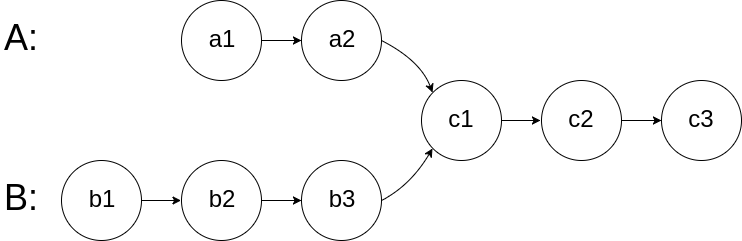

In [11]:
"""
LeetCode题集：160 两个链表的相交结点
160. Intersection of Two Linked Lists
Write a program to find the node at which the intersection of two singly linked lists begins.

For example, the two linked lists（A and B）:


begin to intersect at node c1.

"""
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution(object):
    def getIntersectionNode(self, headA, headB):
        """
        :type head1, head1: ListNode
        :rtype: ListNode
        """
        if headA is None or headB is None:
            return None

        pa = headA # 2 pointers
        pb = headB

        while pa is not pb:
            #当两个指针不相同，进行相应的操作
            #pa遍历表A（前半段不同部分+后半段相同部分）+表B的前半段（不同的部分）
            #pb遍历表B（前半段不同部分+后半段相同部分）+表A的前半段（不同的部分）
            #这样，pa和pb遍历的结点数会相等（在pa==pb时），此时pa和pb都指向IntersectionNode
            pa = headB if pa is None else pa.next
            pb = headA if pb is None else pb.next

        return pa 
# 如果AB表长度不同，pa指向的是IntersectionNode;如果相同，pa指向的是表末（也IntersectionNode）

8.

In [13]:
"""
LeetCode题集：876 链表中间结点
876. Middle of the Linked List
Given a non-empty, singly linked list with head node head, return a middle node of linked list.

If there are two middle nodes, return the second middle node.
"""
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution(object):
    def middleNode(self, head):
        """
        :type head: ListNode
        :rtype: ListNode
        """
        """错误解答
        p = head
        q = head.next
        while q.next.next:
            p = p.next
            q = q.next.next
        if q.next:
            p = p.next
        return p
        """
    def middleNode(self, head):
        tmp = head
        while tmp and tmp.next: #不满足这个关系时，慢指针刚好指向链表中间结点
            head = head.next #慢指针每次走一
            tmp = tmp.next.next #快指针每次走二
        return head

9.

In [14]:
"""
LeetCode题集： 234.回文数
234. Palindrome Linked List
Given a singly linked list, determine if it is a palindrome.

Example 1:

Input: 1->2
Output: false
Example 2:

Input: 1->2->2->1
Output: true
"""
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution(object):
    def isPalindrome(self, head):
        """
        :type head: ListNode
        :rtype: bool
        """
        fast = slow = head
        # 下段 找到中间结点
        while fast and fast.next:
            fast = fast.next.next
            slow = slow.next
        # 反转中间结点之后的链表，成为B（包括中间结点）
        node = None
        while slow:
            nxt = slow.next
            slow.next = node
            node = slow
            slow = nxt
        # 依次比较B和原链表前半部分结点的值
        while node: # while node and head:
            if node.val != head.val:
                return False
            node = node.next
            head = head.next
        return True

10.

In [15]:
"""
LeetCode题集：707定义链表类
707. Design Linked List
Design your implementation of the linked list.
"""
class Node(object):

    def __init__(self, val):
        self.val = val
        self.next = None

# 基本操作，不作注释
class MyLinkedList(object):

    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.head = None
        self.size = 0

    def get(self, index):
        """
        Get the value of the index-th node in the linked list. If the index is invalid, return -1.
        :type index: int
        :rtype: int
        """
        if index < 0 or index >= self.size:
            return -1

        if self.head is None:
            return -1

        curr = self.head
        for i in range(index):
            curr = curr.next
        return curr.val

    def addAtHead(self, val):
        """
        Add a node of value val before the first element of the linked list.
        After the insertion, the new node will be the first node of the linked list.
        :type val: int
        :rtype: void
        """
        node = Node(val)
        node.next = self.head
        self.head = node

        self.size += 1

    def addAtTail(self, val):
        """
        Append a node of value val to the last element of the linked list.
        :type val: int
        :rtype: void
        """
        curr = self.head
        if curr is None:
            self.head = Node(val)
        else:
            while curr.next is not None:
                curr = curr.next
            curr.next = Node(val)

        self.size += 1

    def addAtIndex(self, index, val):
        """
        Add a node of value val before the index-th node in the linked list.
        If index equals to the length of linked list, the node will be appended to the end of linked list.
        If index is greater than the length, the node will not be inserted.
        :type index: int
        :type val: int
        :rtype: void
        """
        if index < 0 or index > self.size:
            return

        if index == 0:
            self.addAtHead(val)
        else:
            curr = self.head
            for i in range(index - 1):
                curr = curr.next
            node = Node(val)
            node.next = curr.next
            curr.next = node

            self.size += 1

    def deleteAtIndex(self, index):
        """
        Delete the index-th node in the linked list, if the index is valid.
        :type index: int
        :rtype: void
        """
        if index < 0 or index >= self.size:
            return

        curr = self.head
        if index == 0:
            self.head = curr.next
        else:
            for i in range(index - 1):
                curr = curr.next
            curr.next = curr.next.next

        self.size -= 1
# Your MyLinkedList object will be instantiated and called as such:
# obj = MyLinkedList()
# param_1 = obj.get(index)
# obj.addAtHead(val)
# obj.addAtTail(val)
# obj.addAtIndex(index,val)
# obj.deleteAtIndex(index)

11.

In [16]:
"""
LeetCode题集：142.找出链表中循环开始的起始点
142. Linked List Cycle II
Given a linked list, return the node where the cycle begins. If there is no cycle, return null.

To represent a cycle in the given linked list, we use an integer pos which represents the position (0-indexed) in the 
linked list where tail connects to. If pos is -1, then there is no cycle in the linked list.

Note: Do not modify the linked list.
"""
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.next = None
"""
Consider the following linked list, where E is the cylce entry and X, the crossing point of fast and slow.
        H: distance from head to cycle entry E
        D: distance from E to X
        L: cycle length
                          _____
                         /     \
        head_____H______E       \
                        \       /
                         X_____/   
        
    
        If fast and slow both start at head, when fast catches slow, slow has traveled H+D and fast 2(H+D). 
        Assume fast has traveled n loops in the cycle, we have:
        2H + 2D = H + D + nL  -->  H + D = nL  --> H = nL - D
        Thus if two pointers start from head and X, respectively, one first reaches E, the other also reaches E. 
        In my solution, since fast starts at head.next, we need to move slow one step forward in the beginning of part 2
"""
class Solution(object):
    def detectCycle(self, head):
        """
        :type head: ListNode
        :rtype: ListNode
        """
        try:
            fast = head.next
            slow = head
            while fast is not slow: #若存在循环，快慢指针终会相遇
                fast = fast.next.next
                slow = slow.next
        except:
            # 如果fast != slow，没有循环
            return None

        # since fast starts at head.next, we need to move slow one step forward
        slow = slow.next
        while head is not slow:#根据注释的分析，head和slow会在进入循环结点出相遇
            head = head.next
            slow = slow.next
        return head

12.

In [17]:
"""
LeetCode题集：2.求和
2. Add Two Numbers
You are given two non-empty linked lists representing two non-negative integers. The digits
are stored in reverse order and each of their nodes contain a single digit. Add the two numbers and return it as a linked list.

You may assume the two numbers do not contain any leading zero, except the number 0 itself.

Example:

Input: (2 -> 4 -> 3) + (5 -> 6 -> 4)
Output: 7 -> 0 -> 8
Explanation: 342 + 465 = 807.
"""
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution(object):
    def addTwoNumbers(self, l1, l2):
        """
        :type l1: ListNode
        :type l2: ListNode
        :rtype: ListNode
        """
        dummy = cur = ListNode(0)#建立新表头
        carry = 0 #进位符
        while l1 or l2 or carry: # 结点存在或者有进位
            #不管是L1存在还是L2存在，用carry表示L2.val+L2.val+carry的和
            if l1:
                carry += l1.val
                l1 = l1.next
            if l2:
                carry += l2.val
                l2 = l2.next
            cur.next = ListNode(carry%10)#对10取余，和大于等于10，取个位，并连接结点
            cur = cur.next #指针后移
            carry //= 10 #除以10的商，结果为0或1，表示进位与否
        return dummy.next #去掉表头的0